# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [136]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Data Overview

- Observations
- Sanity checks

In [137]:
df = pd.read_csv('INNHotelsGroup.csv')

In [138]:
df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68000,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50000,0,Canceled


In [139]:
df.tail(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80000,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95000,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39000,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50000,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67000,0,Not_Canceled


In [140]:
df.shape

(36275, 19)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [142]:
df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275,36275.00000,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275,36275.00000,36275.00000,36275.00000,36275.00000,36275.00000,36275
unique,36275,nan,nan,nan,nan,4,nan,7,nan,nan,nan,nan,5,nan,nan,nan,nan,nan,2
top,INN30935,nan,nan,nan,nan,Meal Plan 1,nan,Room_Type 1,nan,nan,nan,nan,Online,nan,nan,nan,nan,nan,Not_Canceled
freq,1,nan,nan,nan,nan,27835,nan,28130,nan,nan,nan,nan,23214,nan,nan,nan,nan,nan,24390
mean,NaN,1.84496,0.10528,0.81072,2.20430,NaN,0.03099,NaN,85.23256,2017.82043,7.42365,15.59700,NaN,0.02564,0.02335,0.15341,103.42354,0.61966,NaN
std,NaN,0.51871,0.40265,0.87064,1.41090,NaN,0.17328,NaN,85.93082,0.38384,3.06989,8.74045,NaN,0.15805,0.36833,1.75417,35.08942,0.78624,NaN
min,NaN,0.00000,0.00000,0.00000,0.00000,NaN,0.00000,NaN,0.00000,2017.00000,1.00000,1.00000,NaN,0.00000,0.00000,0.00000,0.00000,0.00000,NaN
25%,NaN,2.00000,0.00000,0.00000,1.00000,NaN,0.00000,NaN,17.00000,2018.00000,5.00000,8.00000,NaN,0.00000,0.00000,0.00000,80.30000,0.00000,NaN
50%,NaN,2.00000,0.00000,1.00000,2.00000,NaN,0.00000,NaN,57.00000,2018.00000,8.00000,16.00000,NaN,0.00000,0.00000,0.00000,99.45000,0.00000,NaN
75%,NaN,2.00000,0.00000,2.00000,3.00000,NaN,0.00000,NaN,126.00000,2018.00000,10.00000,23.00000,NaN,0.00000,0.00000,0.00000,120.00000,1.00000,NaN


In [143]:
df['Booking_ID'].nunique()

36275

* Since all of the Booking IDs are unique, we can drop them

In [144]:
df.drop(["Booking_ID"], axis=1, inplace=True)

In [145]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Leading Questions

**1. What are the busiest months in the hotel?**

In [146]:
df.groupby('arrival_month')['booking_status'].count()

arrival_month
1     1014
2     1704
3     2358
4     2736
5     2598
6     3203
7     2920
8     3813
9     4611
10    5317
11    2980
12    3021
Name: booking_status, dtype: int64

**Observations**
* The busiest months in the hotels are October, September and August

**2. Which market segment do most of the guests come from?**

In [147]:
df['market_segment_type'].value_counts(normalize=True).reset_index()

,index,market_segment_type
0,Online,0.63994
1,Offline,0.29023
2,Corporate,0.05560
3,Complementary,0.01078
4,Aviation,0.00345


**Observations**
* 64% of guestst come from online
* 29% come from offline
* Corporate, complementary and aviation have a small number of guests

**3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**

In [148]:
df.groupby('room_type_reserved')['avg_price_per_room'].mean().reset_index()

,room_type_reserved,avg_price_per_room
0,Room_Type 1,95.91853
1,Room_Type 2,87.84855
2,Room_Type 3,73.67857
3,Room_Type 4,125.28732
4,Room_Type 5,123.73362
5,Room_Type 6,182.21284
6,Room_Type 7,155.19829


In [149]:
df.groupby('arrival_month')['avg_price_per_room'].mean()

arrival_month
1     74.74976
2     80.73364
3     91.88370
4    101.99880
5    113.81068
6    111.96650
7    111.64932
8    113.20398
9    115.90692
10   104.46087
11    91.28543
12    88.95218
Name: avg_price_per_room, dtype: float64

In [150]:
df.groupby('required_car_parking_space')['avg_price_per_room'].mean()

required_car_parking_space
0   103.03888
1   115.45302
Name: avg_price_per_room, dtype: float64

In [151]:
df.groupby('market_segment_type')['avg_price_per_room'].mean().reset_index()

,market_segment_type,avg_price_per_room
0,Aviation,100.70400
1,Complementary,3.14176
2,Corporate,82.91174
3,Offline,91.63268
4,Online,112.25685


**Observations**
* Room types 6 and 7 are the most expensive for booking while rooms 2 and 3 are the least expensive
* The most expensive months are September, May and August while January, February and December and the least Expensive months
* Required parking space is 14 more expensive than no required parking space
* Booking online is the most expensive while complementary and corporate are the least expensive

**4. What percentage of bookings are canceled?**

In [152]:
len(df[df['booking_status'] == 'Canceled']) / len(df)

0.32763611302549966

**Observations**
* 32.7% of bookings are canceled

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

In [153]:
len(df.loc[(df['repeated_guest'] == 1) & (df['booking_status'] == 'Canceled')]) / len(df[df['repeated_guest'] == 1])

0.017204301075268817

**Observations**
* Only 1.7% of repeated guests cancel

**6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**

In [154]:
df.groupby(['booking_status','no_of_special_requests'])['repeated_guest'].count()

booking_status  no_of_special_requests
Canceled        0                          8545
                1                          2703
                2                           637
Not_Canceled    0                         11232
                1                          8670
                2                          3727
                3                           675
                4                            78
                5                             8
Name: repeated_guest, dtype: int64

**Observations**
* Those who cancel usually have less special requests
* People who do not cancel can have as many as 3, 4, or 5 special requests
* Those who cancel never had more than 2

## Univariate Analysis

In [155]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [156]:
## Reworked this function to allow me to provide my own order and if not then use the default

def labeled_barplot(data, feature, perc=False, n=None, order=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
        
    if order is None:
        order = data[feature].value_counts().index[:n].sort_values()

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order = order)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage
        
        
    plt.show()  # show the plot

In [157]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [158]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Analysis of Number of Adults

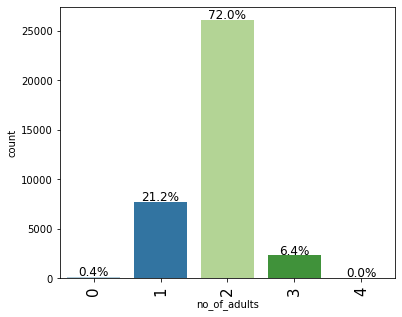

In [159]:
labeled_barplot(df, 'no_of_adults', perc=True)

**Observations**
* 72% of bookings have 2 adults
* 21.2% have 1 adult while 6.4% have 3 adults

#### Analysis of Number of Children

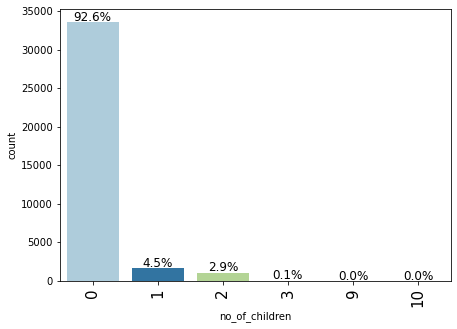

In [160]:
labeled_barplot(df, 'no_of_children', perc=True)

**Obsevations**
* 92.6% of bookings have 0 children
* 4.5% have 1 child and 2.9% have 2 children

#### Analysis of Number of Weekend Nights

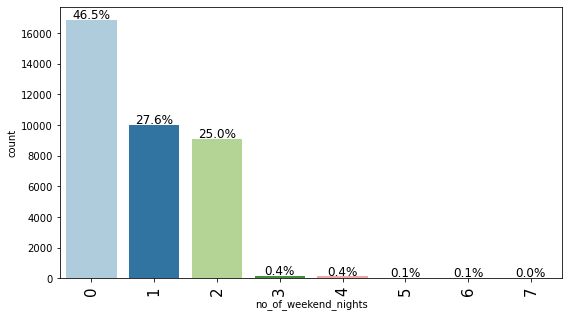

In [161]:
labeled_barplot(df, 'no_of_weekend_nights', perc=True)

**Observations**
* 46.5% of reservations have 0 weekend nights
* 27.6% of reservations have 1 weekend night while 25% have 2 weekend nights
* There are a few reservations who have 3 or more weekend night. Assumption is these guests are staying more than a week

#### Analysis of Number of Week Nights

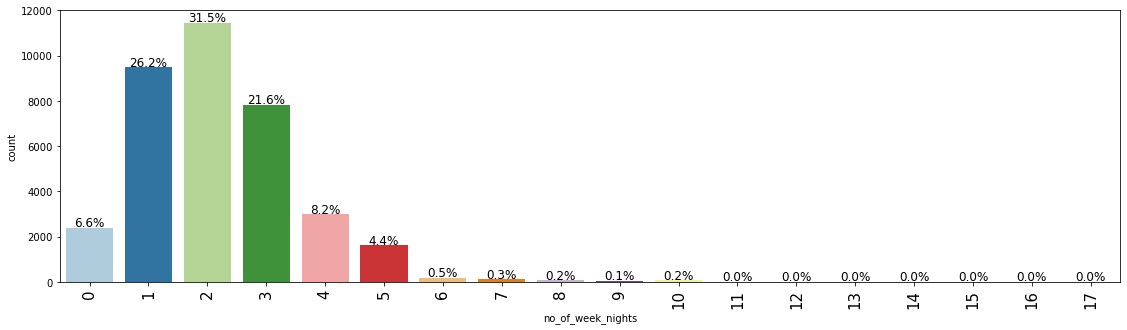

In [162]:
labeled_barplot(df, 'no_of_week_nights', perc=True)

**Observations**
* 31.5% of bookings have 2 week nights booked
* 26.2% have 1 week night booked while 21.6% have 2 week nights booked

#### Analysis of Type of Meal Plan

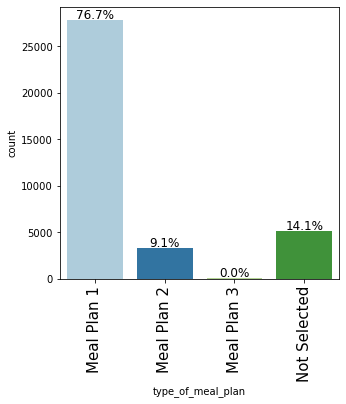

In [163]:
labeled_barplot(df, 'type_of_meal_plan', perc=True)

**Observations**
* 76.7% of bookings have Meal Plan 1 selected
* 14.1% of bookings have no meal plan selected

#### Analysis of Required Car Parking Space

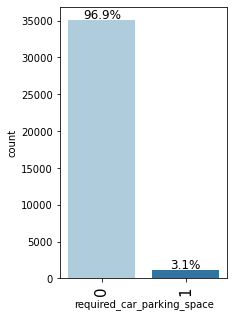

In [164]:
labeled_barplot(df, 'required_car_parking_space', perc=True)

**Observations**
* 96.9% of guests do not have a required car parking space

#### Analysis of Room Type Reserved

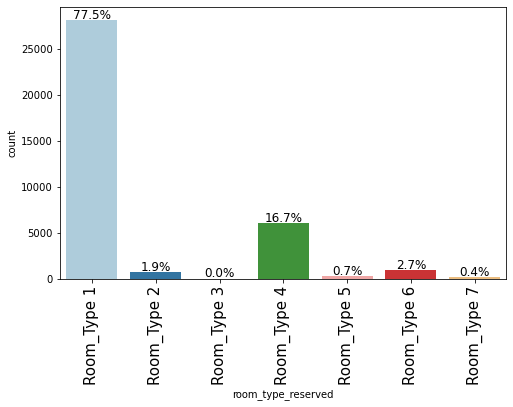

In [165]:
labeled_barplot(df, 'room_type_reserved', perc=True)

**Observations**
* 77.5% of reservations have Room Type 1
* 16.7% of reservations have Room Type 4

#### Analysis of Lead Time

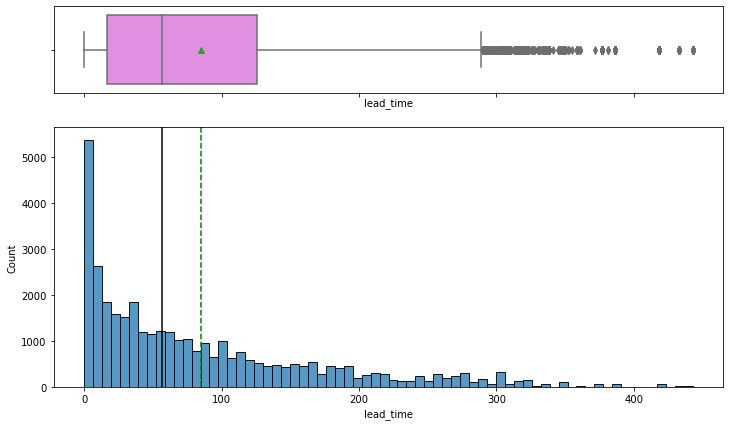

In [166]:
histogram_boxplot(df, 'lead_time')

**Observations**
* The data is skewed to the right with potential outliers on the higher side
* The most common lead times are on the lower end, close to 0

#### Analysis of Arrival Year

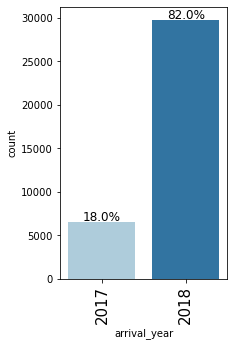

In [167]:
labeled_barplot(df, 'arrival_year', perc=True)

**Observations**
* 82% of bookings are in 2018
* 18% of bookings are in 2017

#### Analysis of Arrival Month

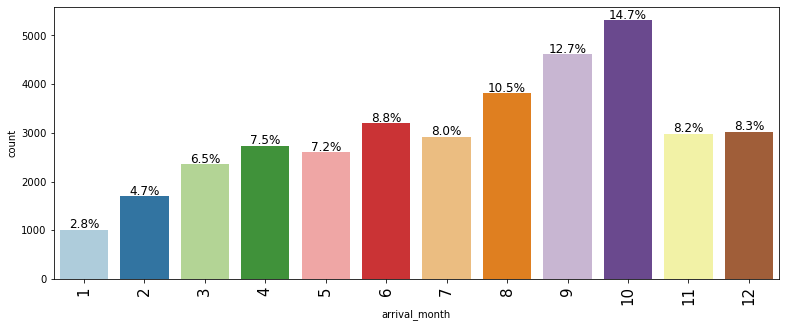

In [168]:
labeled_barplot(df, 'arrival_month', perc=True)

**Observations**
* The most common arrival months are October, September and August in that order
* January, February and March are the lead common arrival months

#### Analysis of Arrival Date

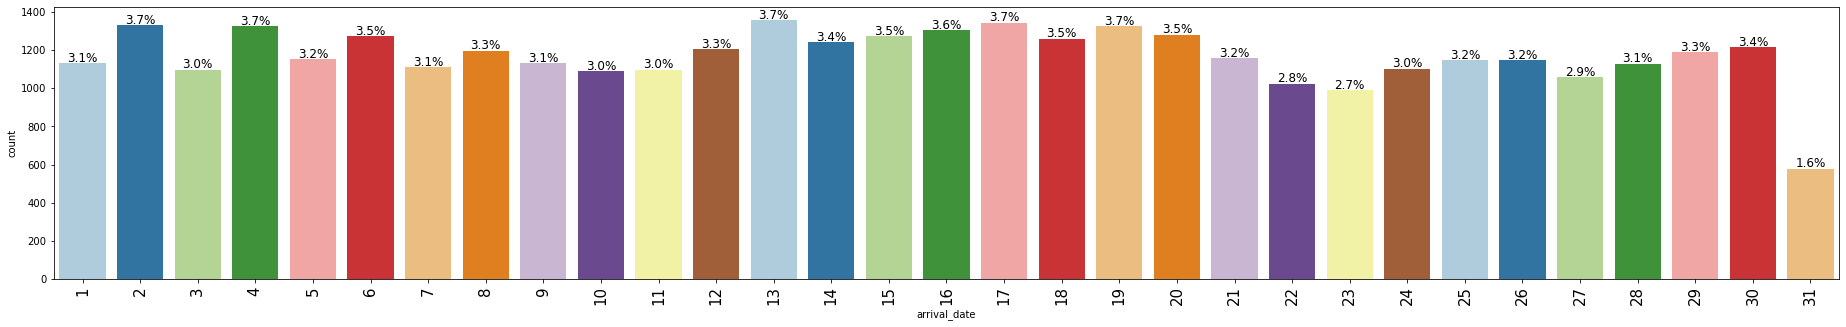

In [169]:
labeled_barplot(df, 'arrival_date', perc=True)

**Observations**
* The arrival day is consistent across the month
* No time of the month is more common than others

#### Analysis of Market Segment Type

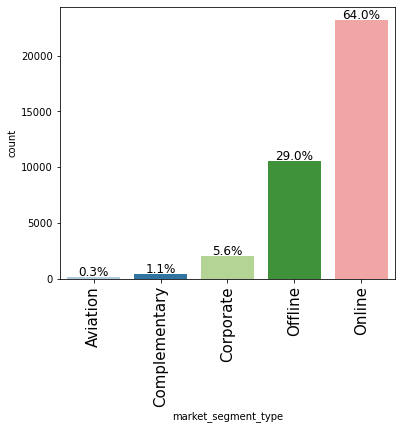

In [170]:
labeled_barplot(df, 'market_segment_type', perc=True)

**Observations**
* 64% of bookings are online
* 29% of bookings are offline
* Corporate, complementary and aviation all have a small number of bookings

#### Analysis of Repeated Guest

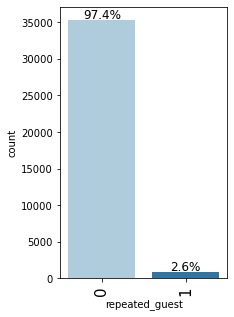

In [171]:
labeled_barplot(df, 'repeated_guest', perc=True)

**Observations**
* 97.4% of bookings are done by new guests
* 2.6% of bookings are by repeated guests

#### Analysis of Number of Previous Cancellations

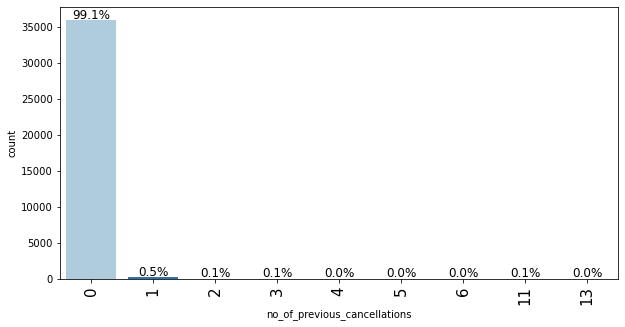

In [172]:
labeled_barplot(df, 'no_of_previous_cancellations', perc=True)

**Observations**
* 99.1% of observations are from guests with 0 previous cancellations

#### Analysis of Number of Previous Bookings Not Canceled

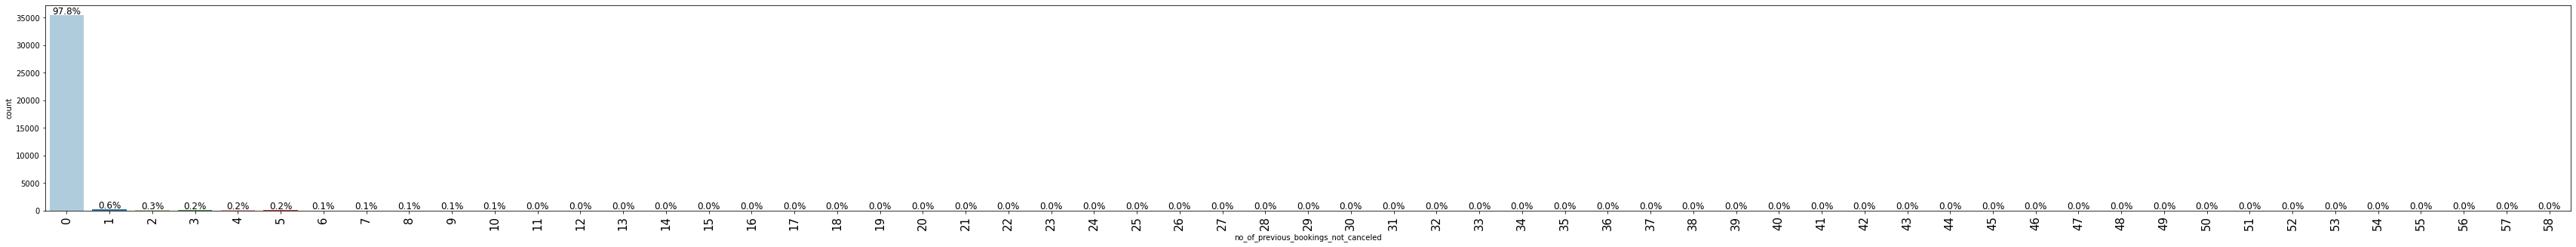

In [173]:
labeled_barplot(df, 'no_of_previous_bookings_not_canceled', perc=True)

In [174]:
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
21        6
20        6
19        6
18        6
17        6
22        6
23        3
24        3
25        3
27        3
32        2
44        2
31        2
30        2
29        2
48        2
28        2
26        2
38        1
33        1
58        1
34        1
35        1
57        1
36        1
56        1
37        1
55        1
54        1
45        1
39        1
53        1
40        1
52        1
41        1
51        1
42        1
50        1
43        1
49        1
47        1
46        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

**Observations**
* 97.8% of bookings are by guests with no previous cancelations
* There are some guests with as many as 58 cancelations

#### Analysis of Average Price Per Room

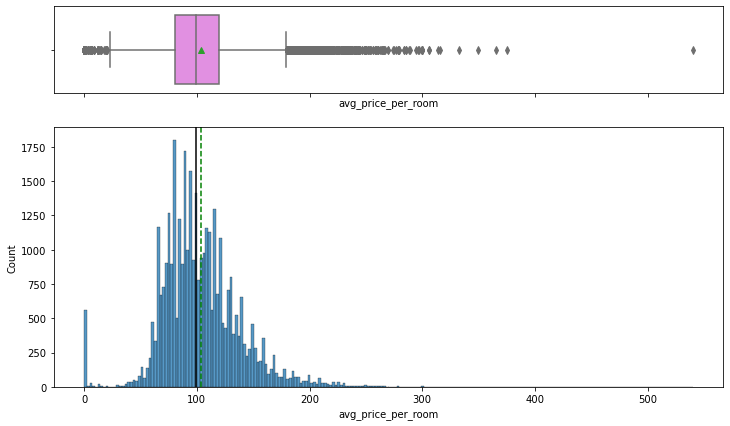

In [175]:
histogram_boxplot(df, 'avg_price_per_room')

**Observations**
* The average and media are very close
* There are over 500 guests who have close to 0 price per room
* There are a handful of prices on the high end which could be outliers

#### Analysis of Number of Special Requests

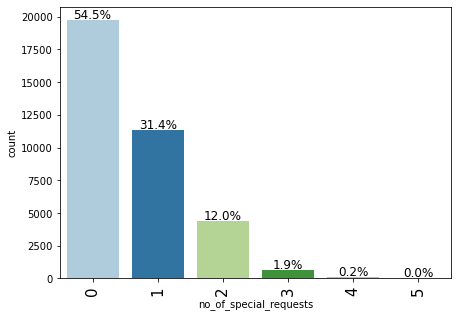

In [176]:
labeled_barplot(df, 'no_of_special_requests', perc=True)

**Observations**
* 54.5% of guests have 0 special requests
* 31.4% have 1 special request while 12% have 2 special requests

#### Analysis of Booking Status

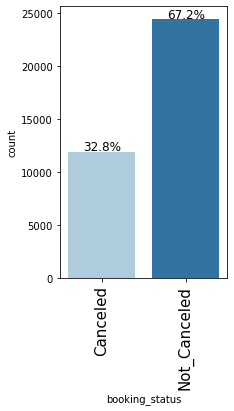

In [177]:
labeled_barplot(df, 'booking_status', perc=True)

**Observations**
* 67.2% of guests did not cancel
* 32.8% of guests canceled their reservation

## Bivariate Analysis

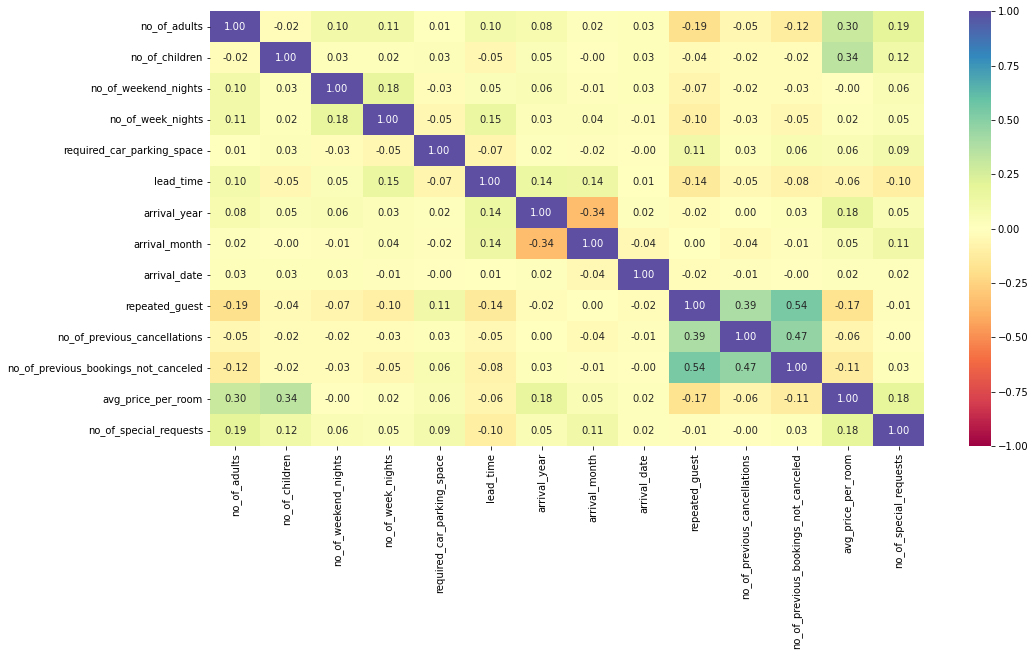

In [178]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Analysis of Average Price vs Number of Adults

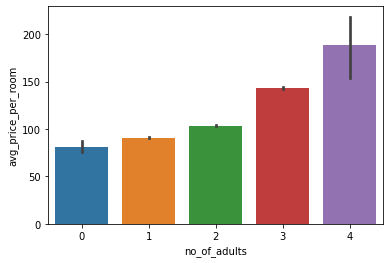

In [179]:
sns.barplot(data=df, x='no_of_adults', y='avg_price_per_room')
plt.show()

**Observations**
* The more adults the higher the price of room

#### Analysis of Average Price vs Number of Children

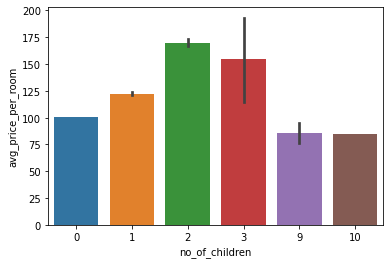

In [180]:
sns.barplot(data=df, x='no_of_children', y='avg_price_per_room')
plt.show()

**Observations**
* The highest average price is for guests with 2 and 3 children
* There are some guests who have 9 and 10 children

#### Analysis of Cancelations vs Market Segment

In [181]:
# Create separate data frame for just cancelations
cancelations = df[df['booking_status'] == 'Canceled']

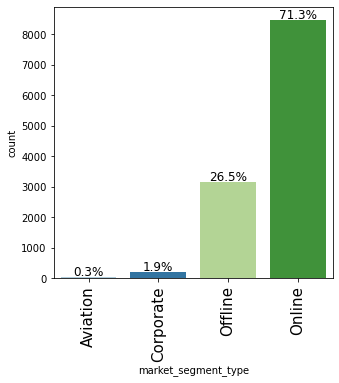

In [182]:
labeled_barplot(cancelations, 'market_segment_type', perc=True)

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


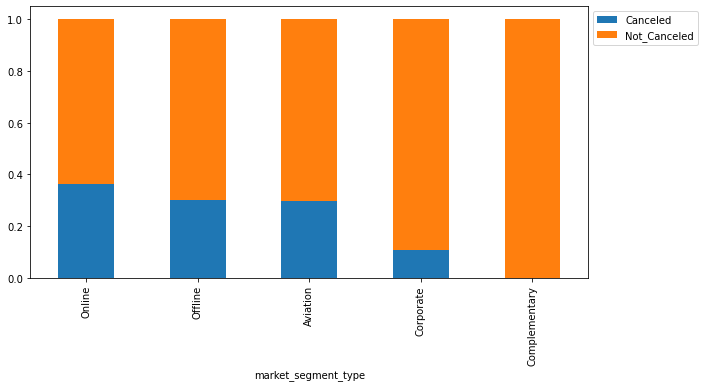

In [183]:
stacked_barplot(df, 'market_segment_type', 'booking_status')

**Observations**
* 71.3% of cancelations are from guests who booked online
* Online had the highest percentage of cancelations compared to the other segment types

#### Analysis of Cancelations vs Room Type

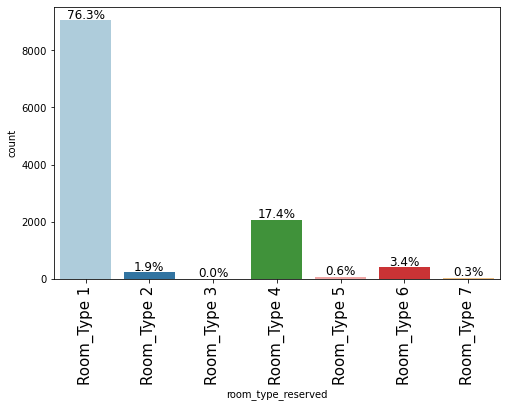

In [184]:
labeled_barplot(cancelations, 'room_type_reserved', perc=True)

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


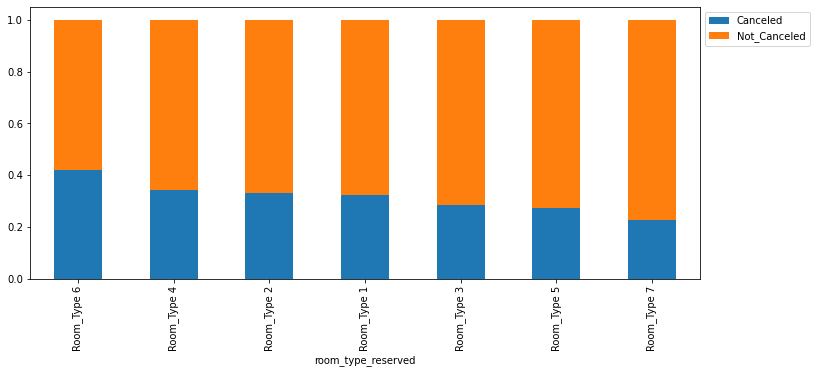

In [185]:
stacked_barplot(df, 'room_type_reserved', 'booking_status')

**Observations**
* 76.3% of cancelations are from Room Type 1
* 17.4% of cancelations are from Room Type 4
* Room Type 6 has the highest percentage of cancelations

#### Analysis of Cancelations vs Meal Plan

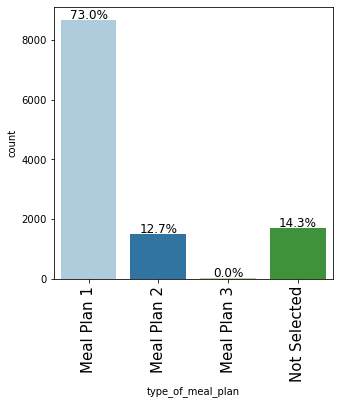

In [186]:
labeled_barplot(cancelations, 'type_of_meal_plan', perc=True)

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


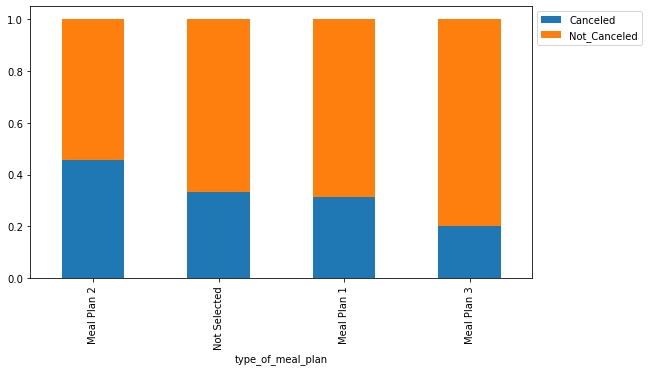

In [187]:
stacked_barplot(df, 'type_of_meal_plan', 'booking_status')

**Observations**
* 73% of cancelations had meal plan 1
* Meal plan 2 had the highest percentage of cancelations out of each meal plan's total

#### Number of Adults vs Cancelations

In [188]:
pd.crosstab(df['booking_status'], df['no_of_adults'], normalize='columns')

no_of_adults,0,1,2,3,4
booking_status,,,,,
Canceled,0.31655,0.24120,0.34928,0.37246,0.18750
Not_Canceled,0.68345,0.75880,0.65072,0.62754,0.81250


booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


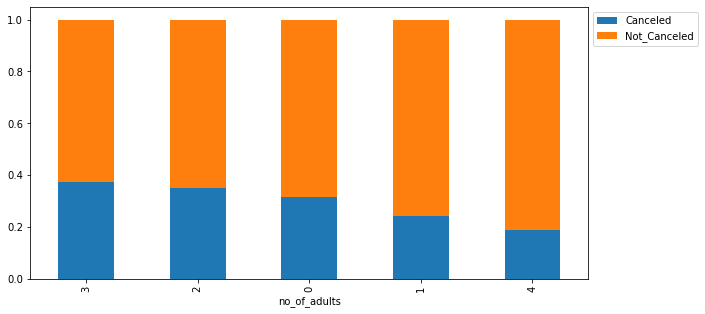

In [189]:
stacked_barplot(df, 'no_of_adults', 'booking_status')

**Observations**
* The highest percentage of cancelations vs non canceltations is for 3 adults
* 4 adults and 1 adults have the lowest percentage of cancelations

#### Number of Children vs Cancelations

In [190]:
pd.crosstab(df['booking_status'], df['no_of_children'], normalize='columns')

no_of_children,0,1,2,3,9,10
booking_status,,,,,,
Canceled,0.32409,0.33375,0.43195,0.26316,0.50000,0.00000
Not_Canceled,0.67591,0.66625,0.56805,0.73684,0.50000,1.00000


booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


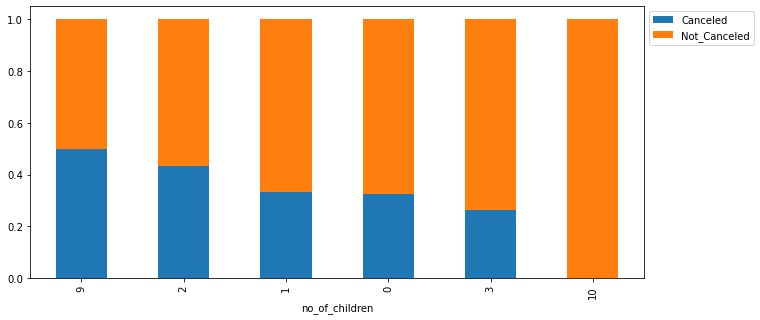

In [191]:
stacked_barplot(df, 'no_of_children', 'booking_status')

**Observations**
* 2 children have the highest cancelation percentage with 43% of guets with 2 children canceling
* 9 children have 50% cancelation but that is on a much smaller number of bookings

#### Lead Time vs Cancelations

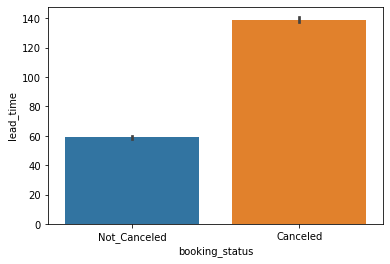

In [192]:
sns.barplot(data=df, x='booking_status', y='lead_time')
plt.show()

**Observations**
* There is a much higher lead time on canceled bookings than not canceled ones
* Guests who book further in advance are much more likely to cancel

#### Booking Status vs Arrival Month

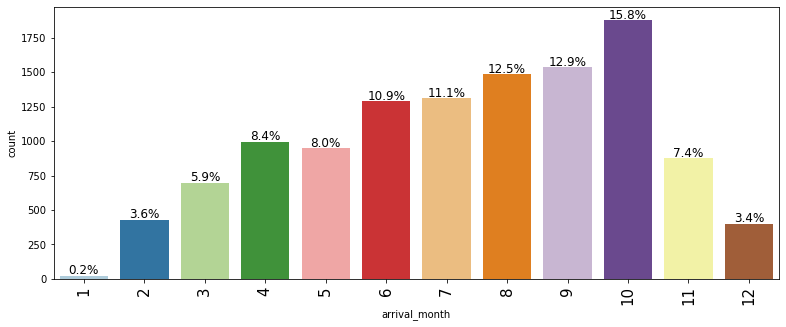

In [193]:
labeled_barplot(cancelations, 'arrival_month', perc=True)

booking_status  Canceled  Not_Canceled    All
arrival_month                                
All                11885         24390  36275
10                  1880          3437   5317
9                   1538          3073   4611
8                   1488          2325   3813
7                   1314          1606   2920
6                   1291          1912   3203
4                    995          1741   2736
5                    948          1650   2598
11                   875          2105   2980
3                    700          1658   2358
2                    430          1274   1704
12                   402          2619   3021
1                     24           990   1014
------------------------------------------------------------------------------------------------------------------------


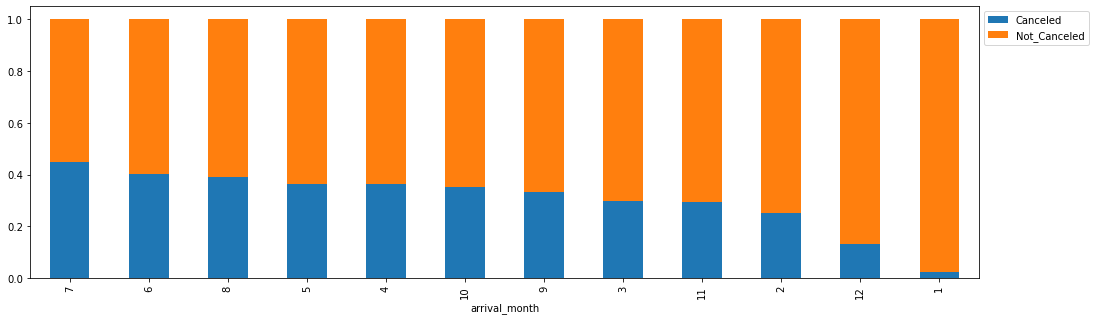

In [194]:
stacked_barplot(df, 'arrival_month', 'booking_status')

**Observations**
* The most common cancelation months are October, September and August which are also the most booked months
* July, June and August have the highest percentage of cancelations

#### Cancelation vs Arrival Date

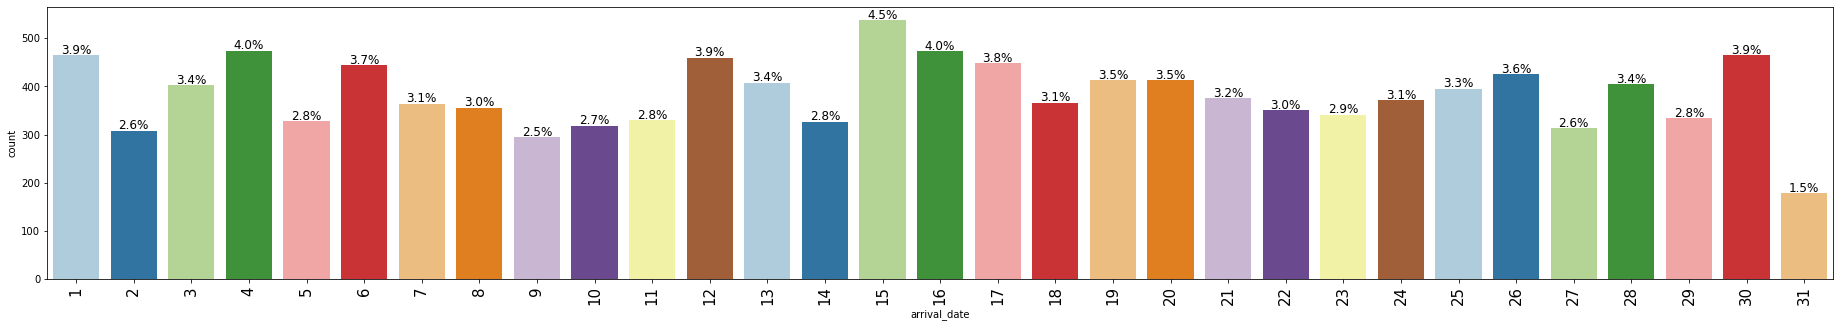

In [195]:
labeled_barplot(cancelations, 'arrival_date', perc=True)

**Observations**
* No day or time seems to have more many more cancelations than others
* Bookings with arrival days of the 15th are the most common at 4.5%

#### Cancelations vs Number of Weekend Nights

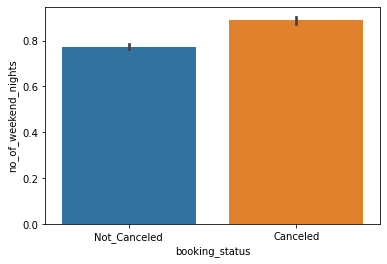

In [196]:
sns.barplot(data=df, x='booking_status', y='no_of_weekend_nights')
plt.show()

**Observations**
* Canceled bookings on average have more weekend nights

#### Cancelations vs Number of Week Nights

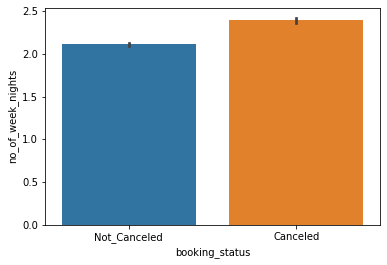

In [197]:
sns.barplot(data=df, x='booking_status', y='no_of_week_nights')
plt.show()

**Observations**
* Canceled bookings have more number of week nights

#### Cancelations vs Average Price

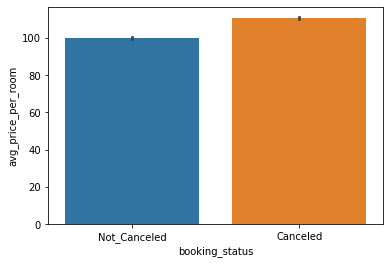

In [198]:
sns.barplot(data=df, x='booking_status', y='avg_price_per_room')
plt.show()

**Observations**
* Canceled rooms have a slightly higher average price per room

#### Booking Status vs Repeated Guest

In [199]:
pd.crosstab(df['booking_status'], df['repeated_guest'], normalize='columns')

repeated_guest,0,1
booking_status,,
Canceled,0.33580,0.01720
Not_Canceled,0.66420,0.98280


repeated_guest      0    1    All
booking_status                   
All             35345  930  36275
Not_Canceled    23476  914  24390
Canceled        11869   16  11885
------------------------------------------------------------------------------------------------------------------------


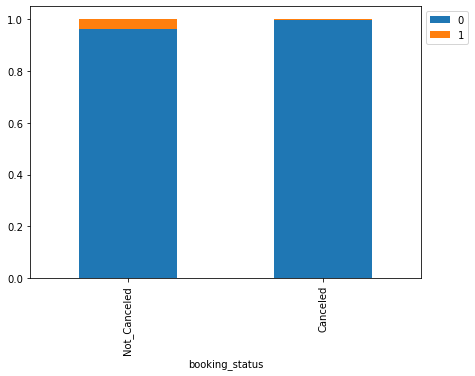

In [200]:
stacked_barplot(df, 'booking_status', 'repeated_guest')

**Observations**
* Guests who are not repeat customers cancel 33.5% of the time
* Guests who are repeat customers cancel 1.7% of the time

#### Repeated Guest vs Average Price Per Room

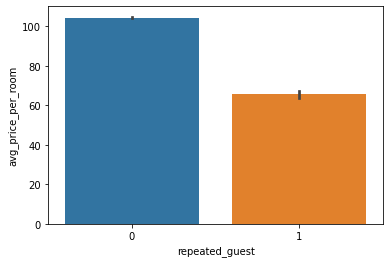

In [201]:
sns.barplot(data=df, x='repeated_guest', y='avg_price_per_room')
plt.show()

**Observations**
* Repeated guests on average spend less money per room than non repeated guests

#### Booking Status vs Special Requirements

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


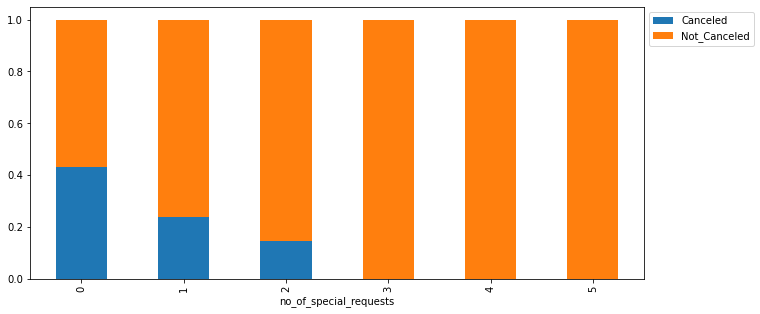

In [202]:
stacked_barplot(df, 'no_of_special_requests', 'booking_status')

**Observations**
* Guests who have more special requests have a lower cancelation rate

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [203]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

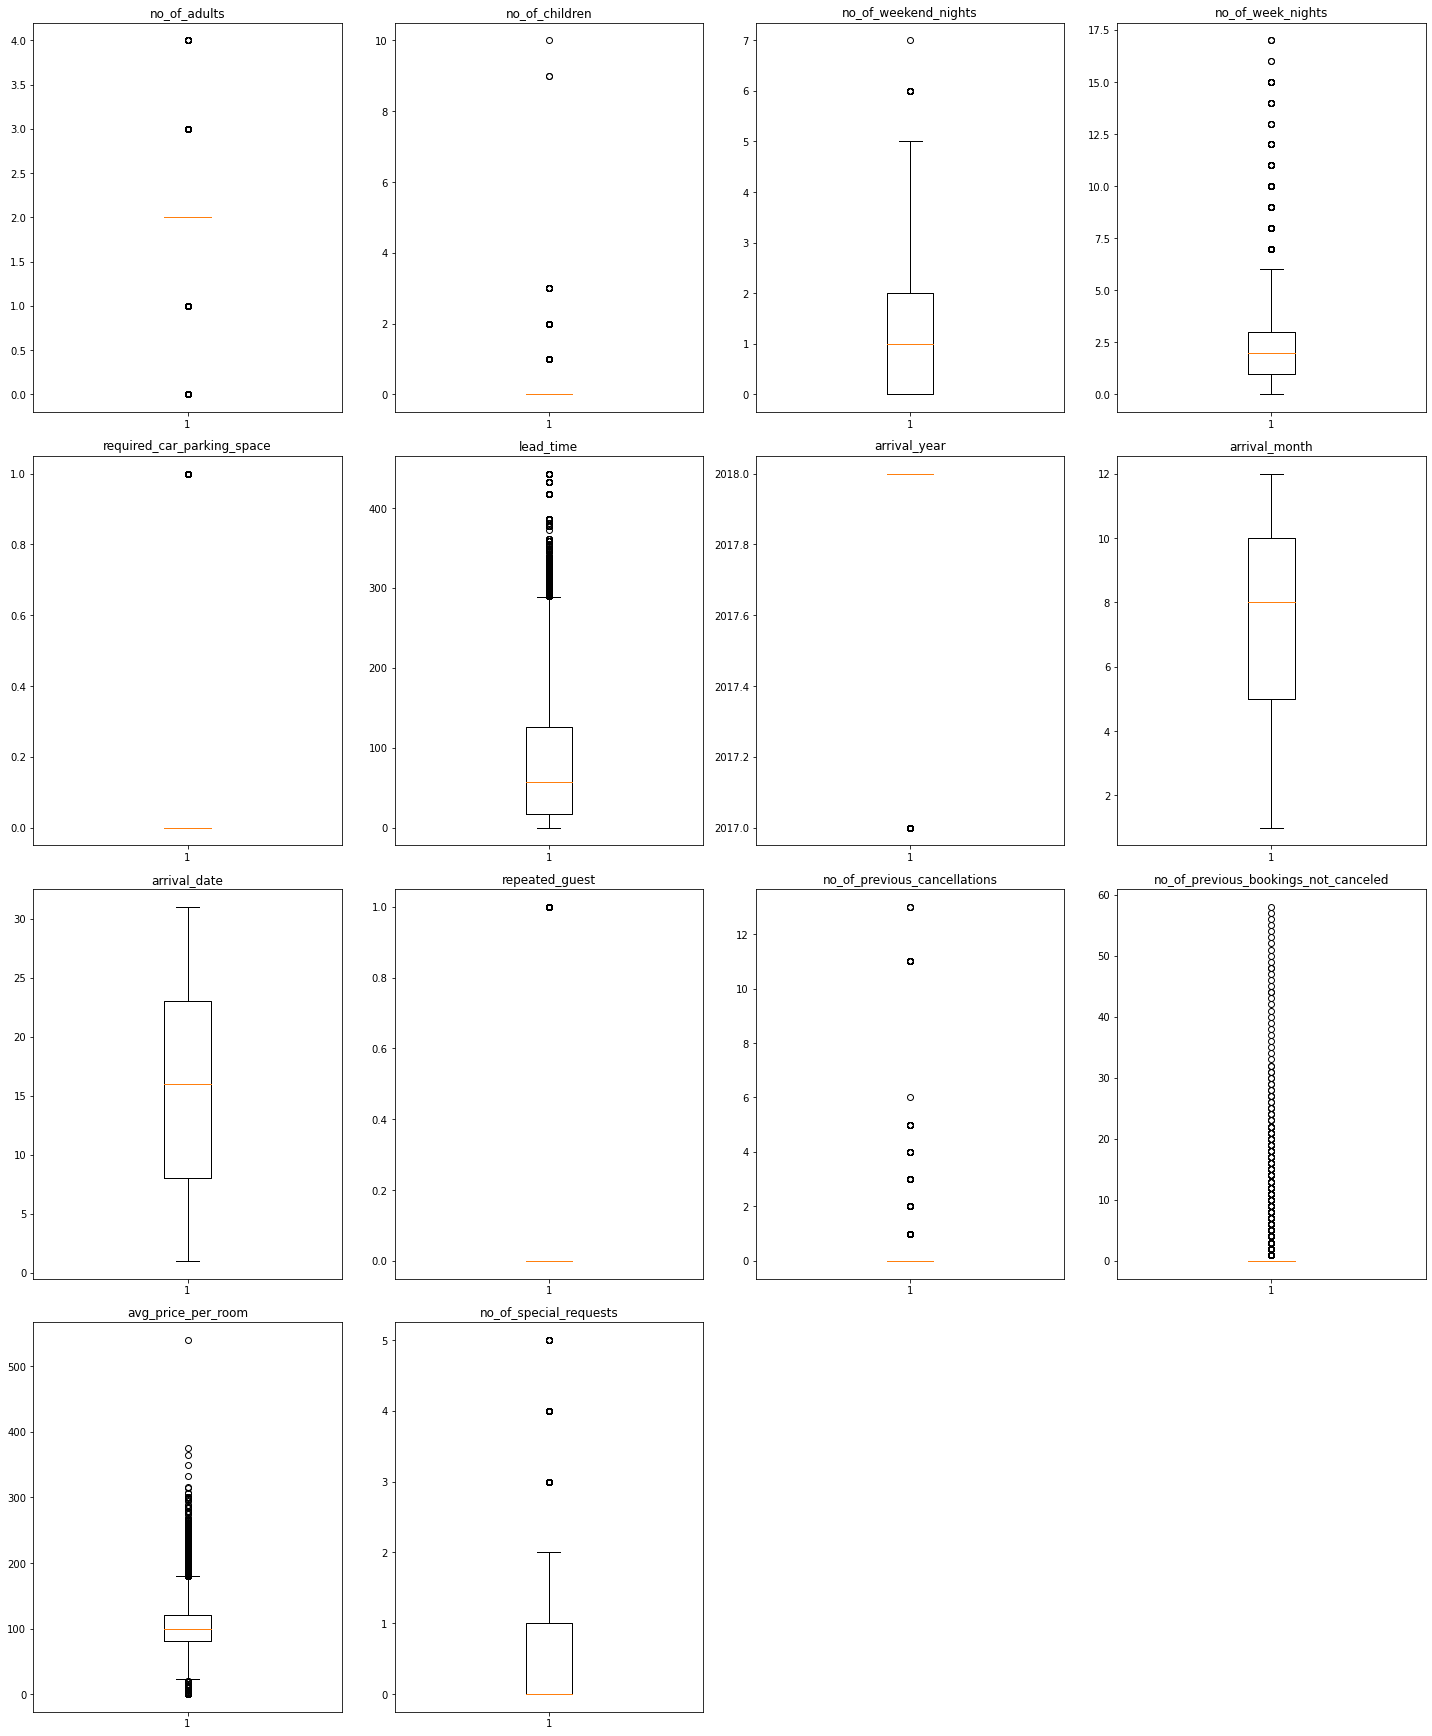

In [204]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [205]:
# Convert booking status to 1 for canceled and 0 if not canceled
df["booking_status"] = df["booking_status"].apply(lambda x: 1 if x == "Canceled" else 0)

In [206]:
# Drop booking status as this is the column we want to try to test further
x = df.drop(['booking_status'], axis=1)
y = df['booking_status']

# Get Dummy Variables for X
x = pd.get_dummies(x, drop_first=True)

# adding constant
x = sm.add_constant(x)

# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1)

In [207]:
print("Shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.67064
1   0.32936
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.67638
1   0.32362
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

In [208]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
const,36275.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000
no_of_adults,36275.00000,1.84496,0.51871,0.00000,2.00000,2.00000,2.00000,4.00000
no_of_children,36275.00000,0.10528,0.40265,0.00000,0.00000,0.00000,0.00000,10.00000
no_of_weekend_nights,36275.00000,0.81072,0.87064,0.00000,0.00000,1.00000,2.00000,7.00000
no_of_week_nights,36275.00000,2.20430,1.41090,0.00000,1.00000,2.00000,3.00000,17.00000
required_car_parking_space,36275.00000,0.03099,0.17328,0.00000,0.00000,0.00000,0.00000,1.00000
lead_time,36275.00000,85.23256,85.93082,0.00000,17.00000,57.00000,126.00000,443.00000
arrival_year,36275.00000,2017.82043,0.38384,2017.00000,2018.00000,2018.00000,2018.00000,2018.00000
arrival_month,36275.00000,7.42365,3.06989,1.00000,5.00000,8.00000,10.00000,12.00000
arrival_date,36275.00000,15.59700,8.74045,1.00000,8.00000,16.00000,23.00000,31.00000


## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [209]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39468156.70600
no_of_adults                                  1.34815
no_of_children                                1.97823
no_of_weekend_nights                          1.06948
no_of_week_nights                             1.09567
required_car_parking_space                    1.03993
lead_time                                     1.39491
arrival_year                                  1.43083
arrival_month                                 1.27567
arrival_date                                  1.00674
repeated_guest                                1.78352
no_of_previous_cancellations                  1.39569
no_of_previous_bookings_not_canceled          1.65199
avg_price_per_room                            2.05042
no_of_special_requests                        1.24728
type_of_meal_plan_Meal Plan 2                 1.27185
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

**Observations**
* We will remove market_segment_type_Online since it has the highest VIF above 10 and re-run the VIF's

### Multicollinearity

In [210]:
x_train1 = x_train.drop("market_segment_type_Online", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index=x_train1.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39391371.31459
no_of_adults                                  1.33178
no_of_children                                1.97735
no_of_weekend_nights                          1.06904
no_of_week_nights                             1.09512
required_car_parking_space                    1.03979
lead_time                                     1.39064
arrival_year                                  1.42838
arrival_month                                 1.27463
arrival_date                                  1.00672
repeated_guest                                1.78019
no_of_previous_cancellations                  1.39545
no_of_previous_bookings_not_canceled          1.65175
avg_price_per_room                            2.04959
no_of_special_requests                        1.24242
type_of_meal_plan_Meal Plan 2                 1.27150
type_of_meal_plan_Meal Plan 3                 1.02522
type_of_meal_plan_Not Selected                1

**Observations**
* There are no variables with VIF's above 10 left

## Building a Logistic Regression model

In [211]:
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit()
print(lg1.summary())

         Current function value: 0.425084
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 26 Mar 2022   Pseudo R-squ.:                  0.3292
Time:                        08:29:42   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -933.3324    120.655     -7.736      0.000   -1169.813

In [212]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [213]:
x_train2 = x_train1[selected_features]

In [214]:
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.425677
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 26 Mar 2022   Pseudo R-squ.:                  0.3283
Time:                        08:29:44   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -917.2860    120.456     -7.615    

## Model performance evaluation

In [215]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=x_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.00000,1.11475,1.16436,1.11475,1.04264,0.20305,1.01584,1.57324,0.95853,0.06480,1.25716,1.01935,0.22994,1.17992,1.33089,0.70046,0.75383,0.47940,0.38099,0.23903,0.45258,0.16750
Change_odd%,-100.00000,11.47536,16.43601,11.47526,4.26363,-79.69523,1.58352,57.32351,-4.14725,-93.52026,25.71567,1.93479,-77.00595,17.99156,33.08924,-29.95389,-24.61701,-52.05967,-61.90093,-76.09669,-54.74162,-83.24963


In [216]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [217]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [218]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(x_train2, y_train)

DecisionTreeClassifier(random_state=1)

## Final Model Summary

In [219]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, x_train2, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.99354,0.98469,0.99565,0.99014


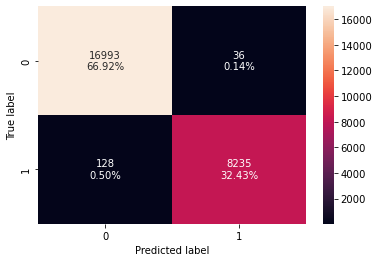

In [220]:
confusion_matrix_sklearn(model, x_train2, y_train)

In [221]:
# Update test columns to match training columns
x_test1 = x_test[selected_features]

In [222]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, x_test1, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.86713,0.80182,0.79059,0.79617


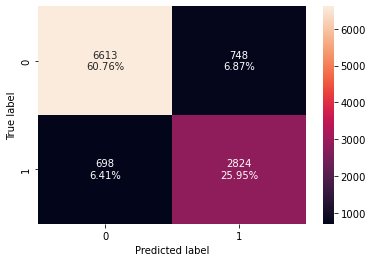

In [223]:
confusion_matrix_sklearn(model, x_test1, y_test)

## Building a Decision Tree model

In [224]:
column_names = list(x_train2.columns)
feature_names = column_names
print(feature_names)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


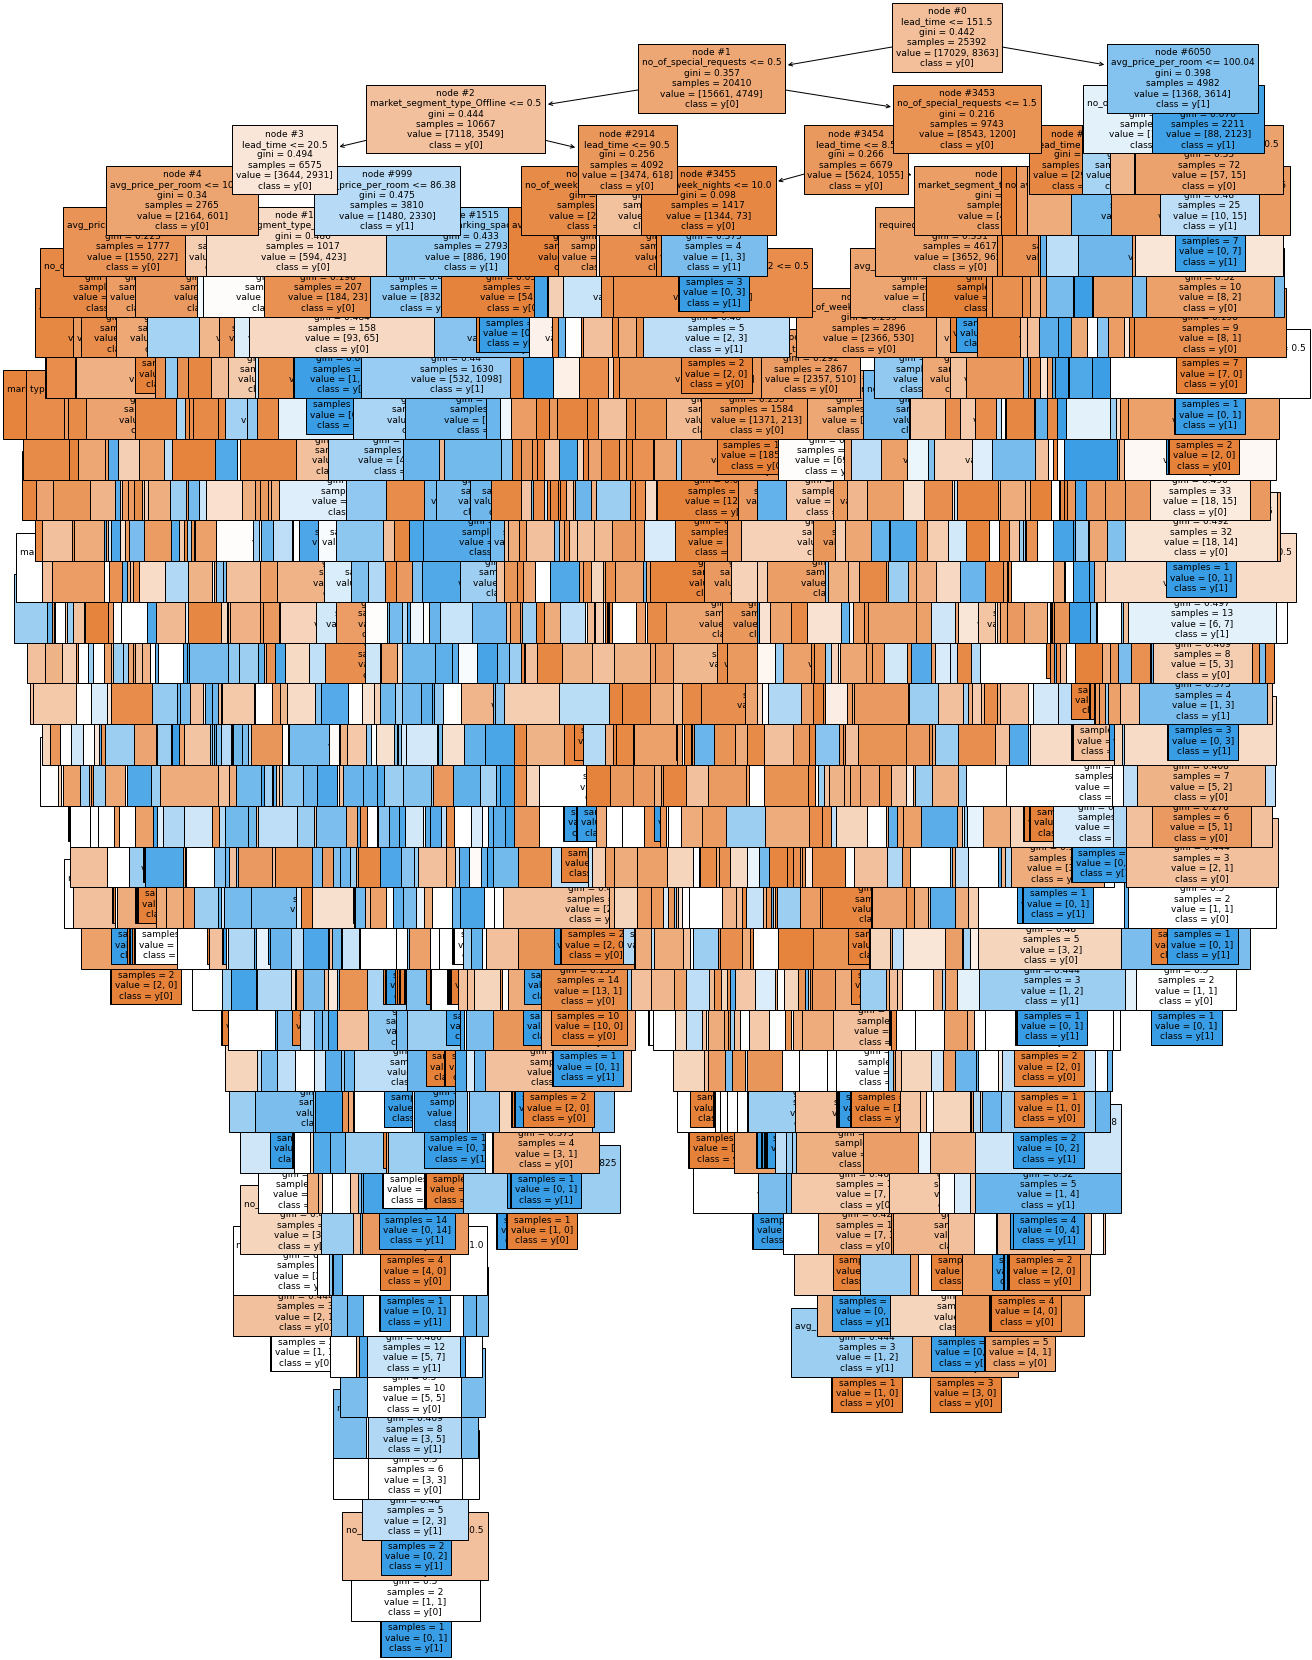

In [225]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [226]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 105.95
|   |   |   |   |   |--- avg_price_per_room <= 78.90
|   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 74.59
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 70.05
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [230.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  70.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |

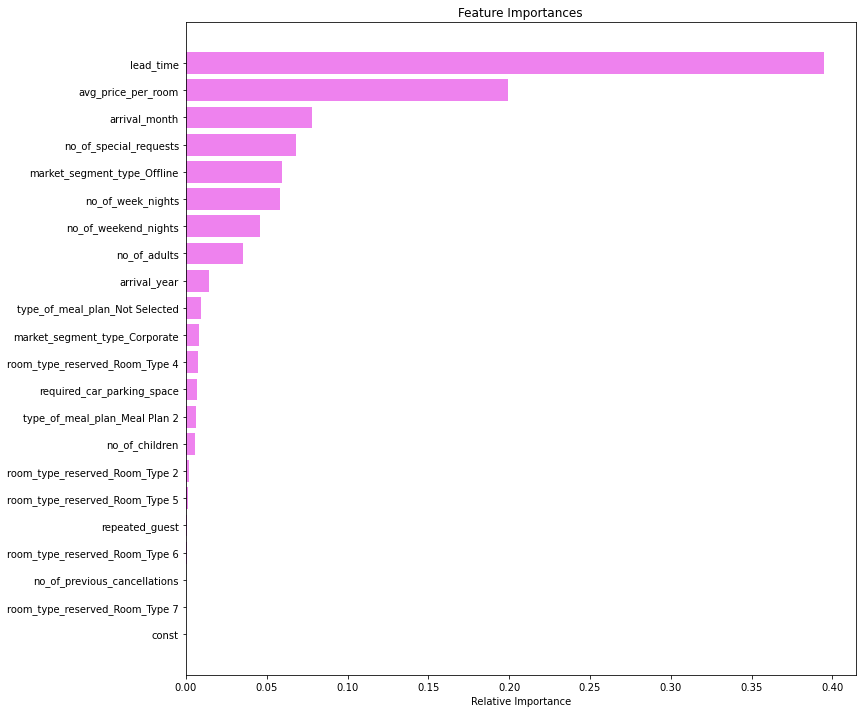

In [227]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Do we need to prune the tree?

In [228]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train2, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train2, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-05,
                       random_state=1)

In [229]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, x_train2, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.99346,0.98469,0.99541,0.99002


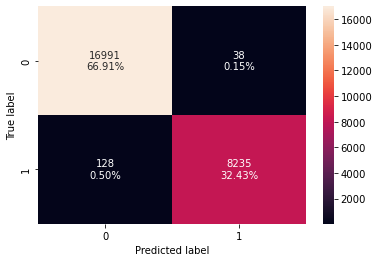

In [230]:
confusion_matrix_sklearn(estimator, x_train2, y_train)

In [231]:
# Run on test data

decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, x_test1, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.86640,0.79955,0.79012,0.79481


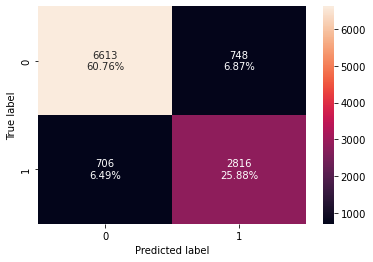

In [232]:
confusion_matrix_sklearn(estimator, x_test1, y_test)

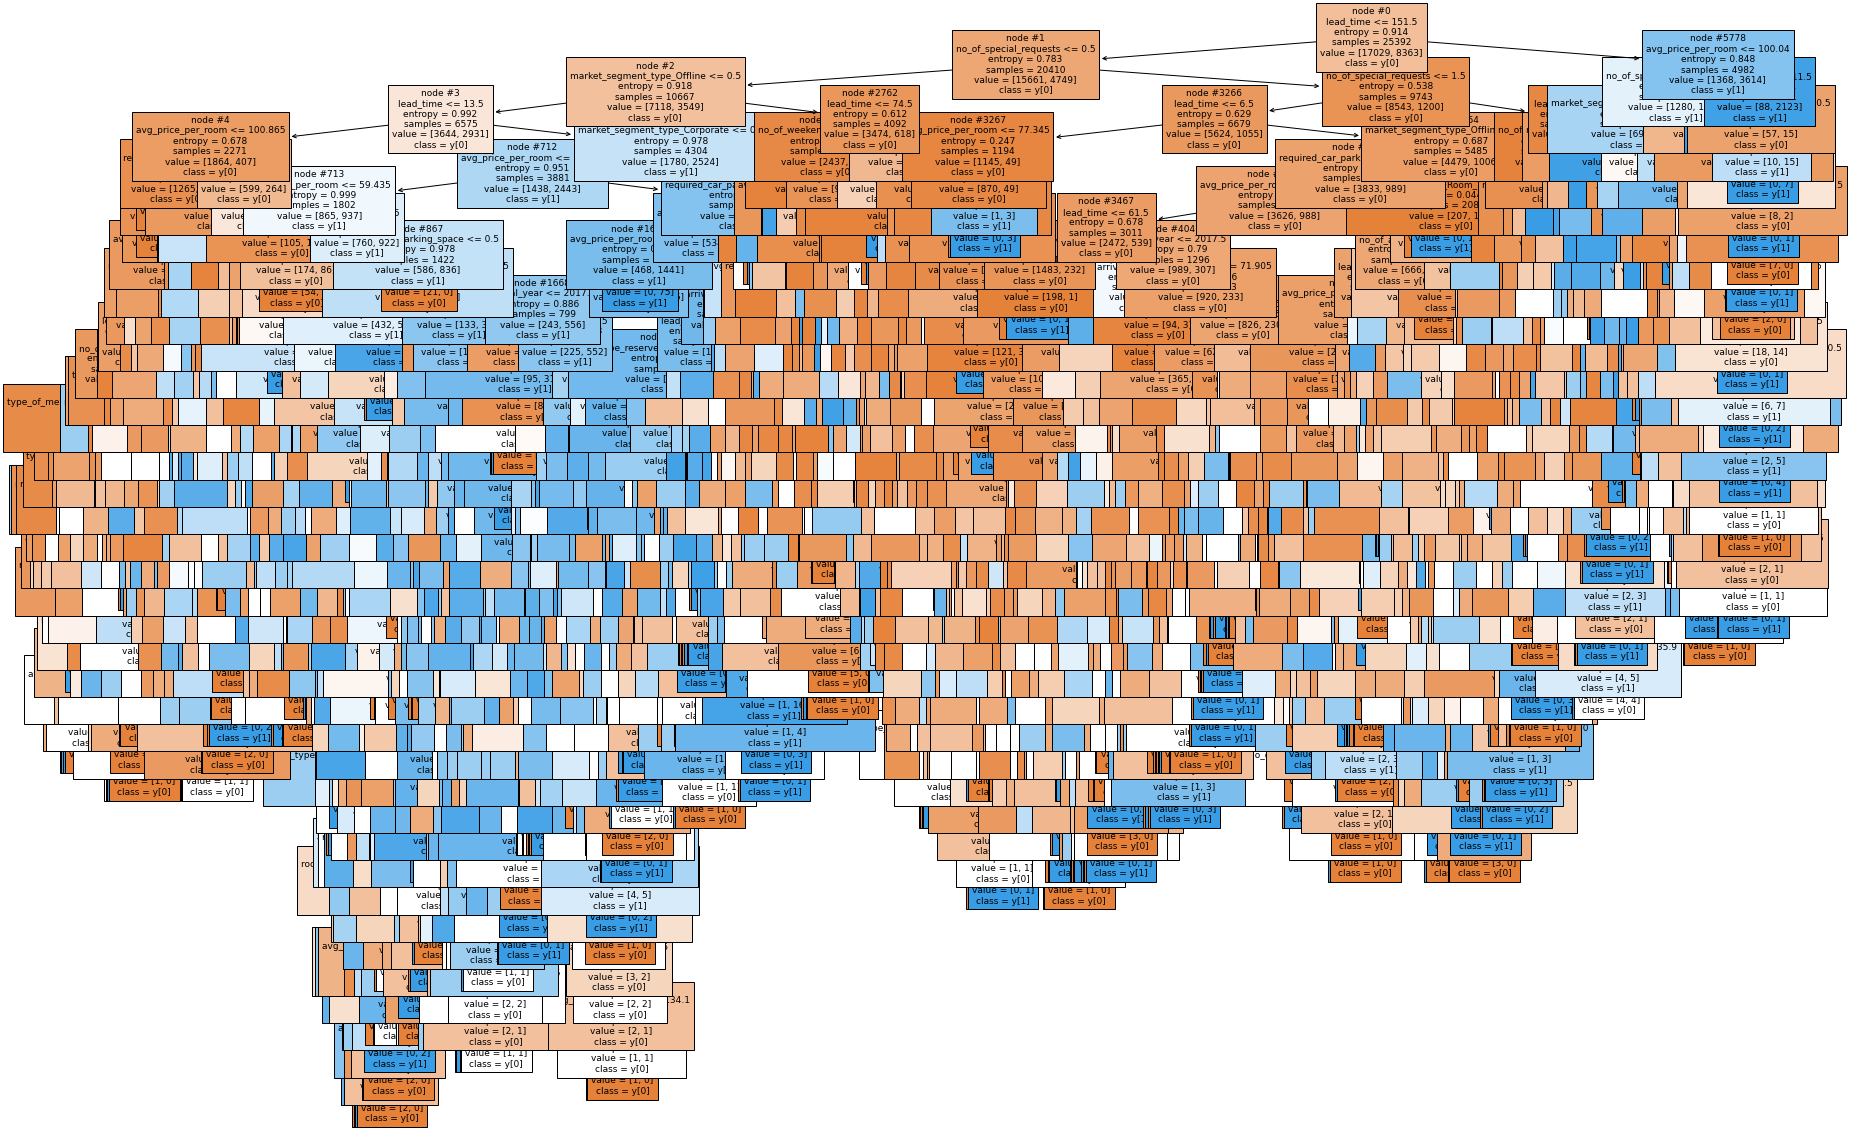

In [233]:
plt.figure(figsize=(30, 20))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

## Cost Complexity Pruning

In [234]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x_train2, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [235]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.00000,0.00831
1,0.00000,0.00831
2,0.00000,0.00831
3,0.00000,0.00831
4,0.00000,0.00831
...,...,...
1434,0.00454,0.28027
1435,0.00659,0.29344
1436,0.01726,0.31070
1437,0.01816,0.36518


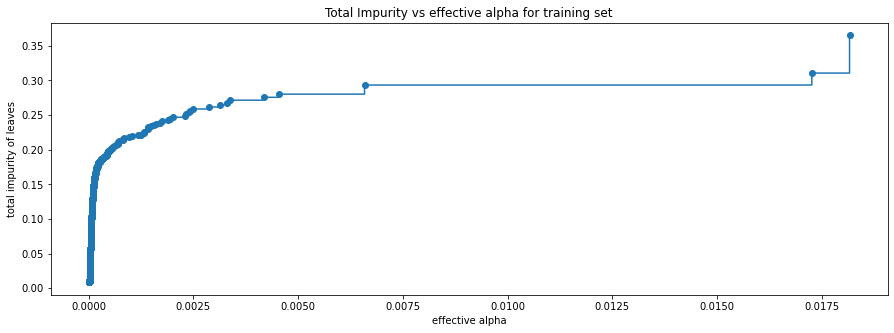

In [236]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [237]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train2, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371368


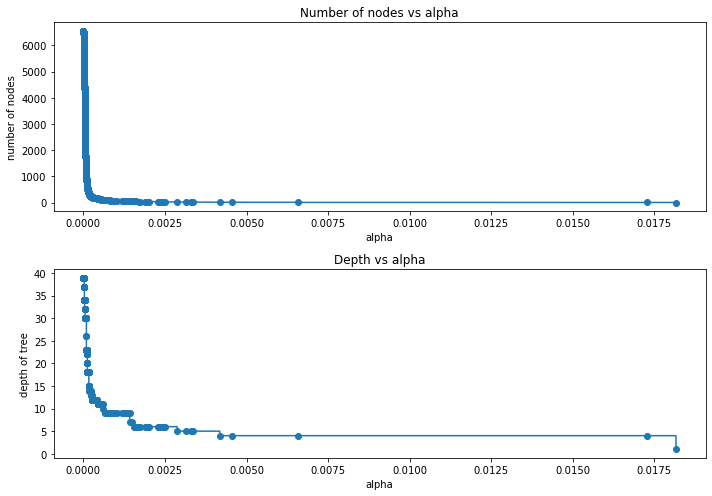

In [238]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [239]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train2)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [240]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test1)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

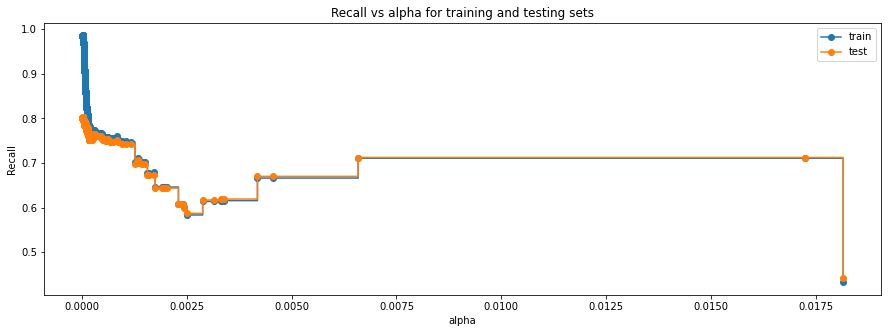

In [241]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [242]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=1.8176530463865078e-05, random_state=1)


In [243]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, x_train2, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.99338,0.98625,0.99362,0.98992


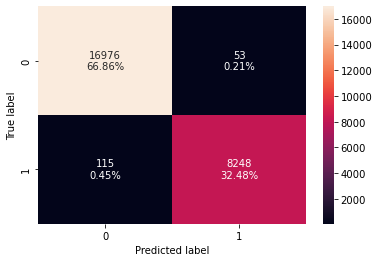

In [244]:
confusion_matrix_sklearn(best_model, x_train2, y_train)

In [245]:
# Check on test set

decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, x_test1, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.86676,0.80324,0.78890,0.79600


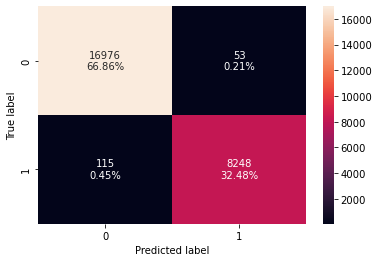

In [246]:
confusion_matrix_sklearn(best_model, x_train2, y_train)

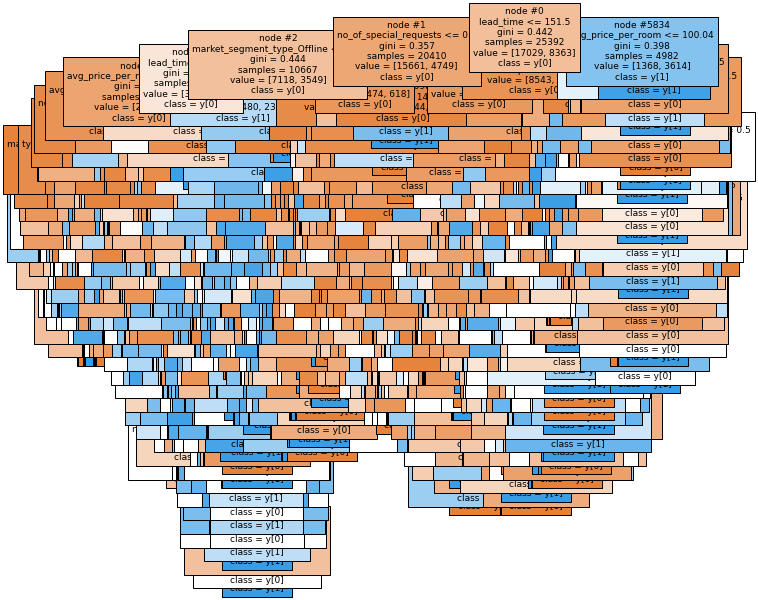

In [247]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [248]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |--- lead_time <= 20.50
|   |   |   |   |--- avg_price_per_room <= 105.95
|   |   |   |   |   |--- avg_price_per_room <= 78.90
|   |   |   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |   |   |--- avg_price_per_room <= 74.59
|   |   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 70.05
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [230.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  70.05
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |

In [249]:
# checking importance of each variable

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train2.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
lead_time                      0.39486
avg_price_per_room             0.19913
arrival_month                  0.07801
no_of_special_requests         0.06823
market_segment_type_Offline    0.05934
no_of_week_nights              0.05777
no_of_weekend_nights           0.04566
no_of_adults                   0.03512
arrival_year                   0.01433
type_of_meal_plan_Not Selected 0.00932
market_segment_type_Corporate  0.00787
room_type_reserved_Room_Type 4 0.00749
required_car_parking_space     0.00660
type_of_meal_plan_Meal Plan 2  0.00597
no_of_children                 0.00532
room_type_reserved_Room_Type 2 0.00214
room_type_reserved_Room_Type 5 0.00123
repeated_guest                 0.00084
room_type_reserved_Room_Type 6 0.00067
no_of_previous_cancellations   0.00009
room_type_reserved_Room_Type 7 0.00000
const                          0.00000


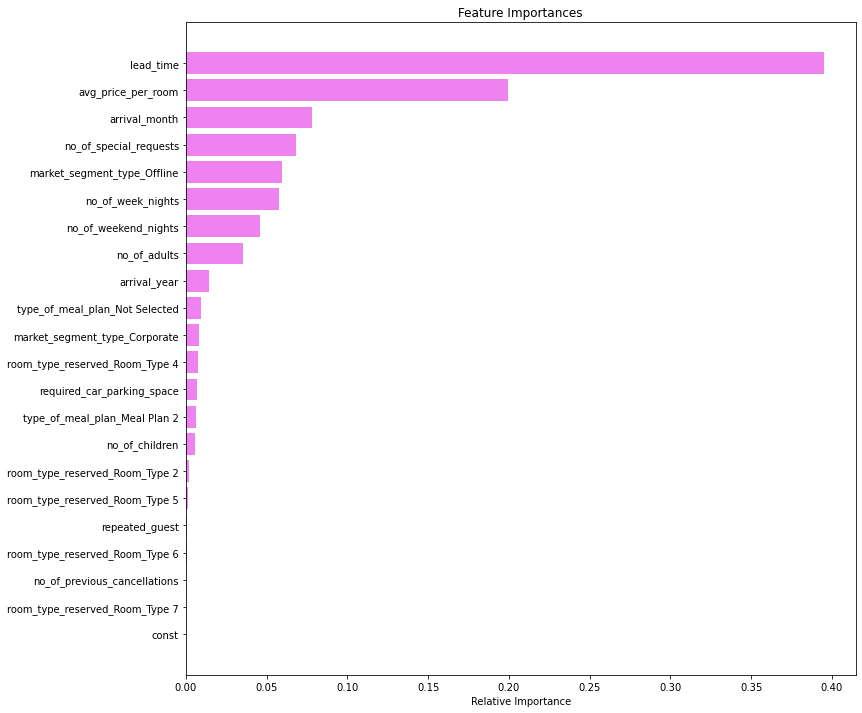

In [250]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [251]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.99354,0.99346,0.99338
Recall,0.98469,0.98469,0.98625
Precision,0.99565,0.99541,0.99362
F1,0.99014,0.99002,0.98992


In [252]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.86713,0.86640,0.86676
Recall,0.80182,0.79955,0.80324
Precision,0.79059,0.79012,0.78890
F1,0.79617,0.79481,0.79600


## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

**Insights**
* Lead time is the most important variable in determining cancelations
* Arrival day has no significance on cancelations
* Average price is the second most important variable to determine if a customer will cancel or not
* Room types and Meal plans do not look to have any effect on if a customer will cancel or not

**Recommendations**
* The hotel should not allow clients to book hotel rooms too early, this causes guests to be more likely to cancel
* The model we would recommend the hotel choose is the Decision Tree sklearn as this has the highest F1. While all the models are close in their performance, the higher F1 of Decision Tree sklearn makes it the best
* The hotel should offer refunds for cancelations on early bookings, but only if the cancel in a reasonable time frame like a few days before the booking was supposed to start